In [33]:
import lightgbm as lgb
import shap
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt




In [41]:
os.chdir( "C:\\Users\\vyago\\Desktop\\Maestría Ciencias de Datos\\07-DMEYF" )

dataset = pd.read_csv("./datasets/competencia2_2022.csv.gz", low_memory=False)


marzo = dataset.loc[dataset["foto_mes"]==202101]

In [42]:
marzo["clase_binaria"] = marzo["clase_ternaria"].apply(lambda x: 0 if x=="CONTINUA" else 1)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [43]:
X = marzo[marzo.columns.drop(["clase_binaria","clase_ternaria"])]
y = marzo["clase_binaria"]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)


In [45]:
d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test)

In [46]:
params = {
    "max_bin": 55,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 1700,
    "verbose": -1,
    "min_data_in_leaf": 2000,
    "boost_from_average": True,
    "feature_fraction":0.25
}

model = lgb.train(params, d_train, 10000, valid_sets=[d_test], early_stopping_rounds=50, verbose_eval=1000)

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	valid_0's binary_logloss: 0.0377772


In [47]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


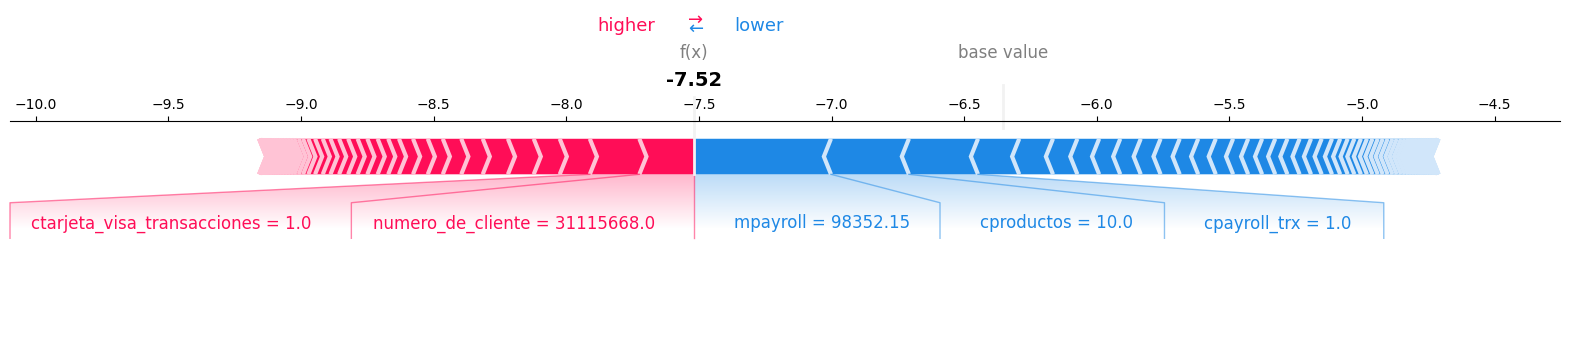

None

In [34]:
plot = shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X.iloc[0,:],matplotlib=True)
display(plot)

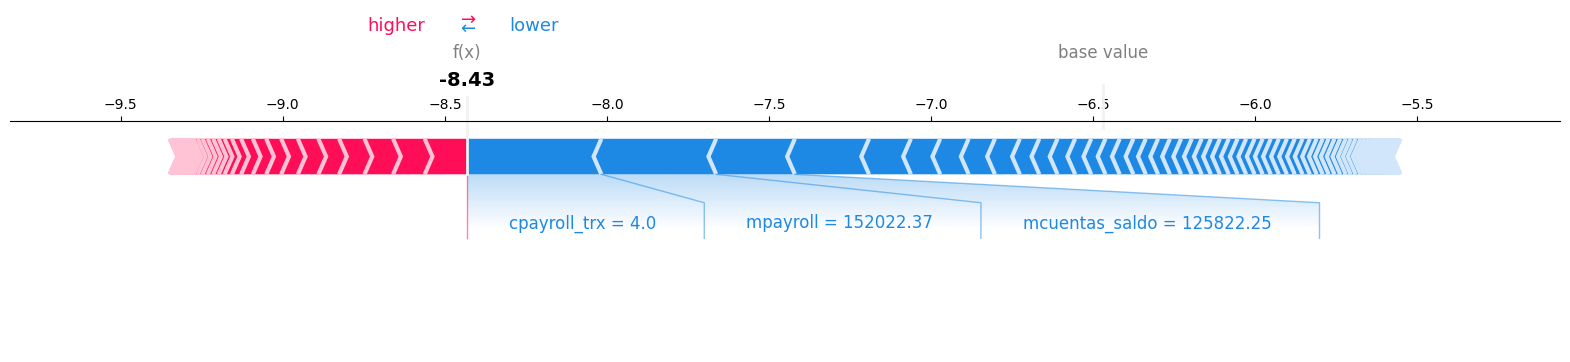

None

In [48]:
plot = shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X.iloc[0,:],matplotlib=True)
display(plot)# enero

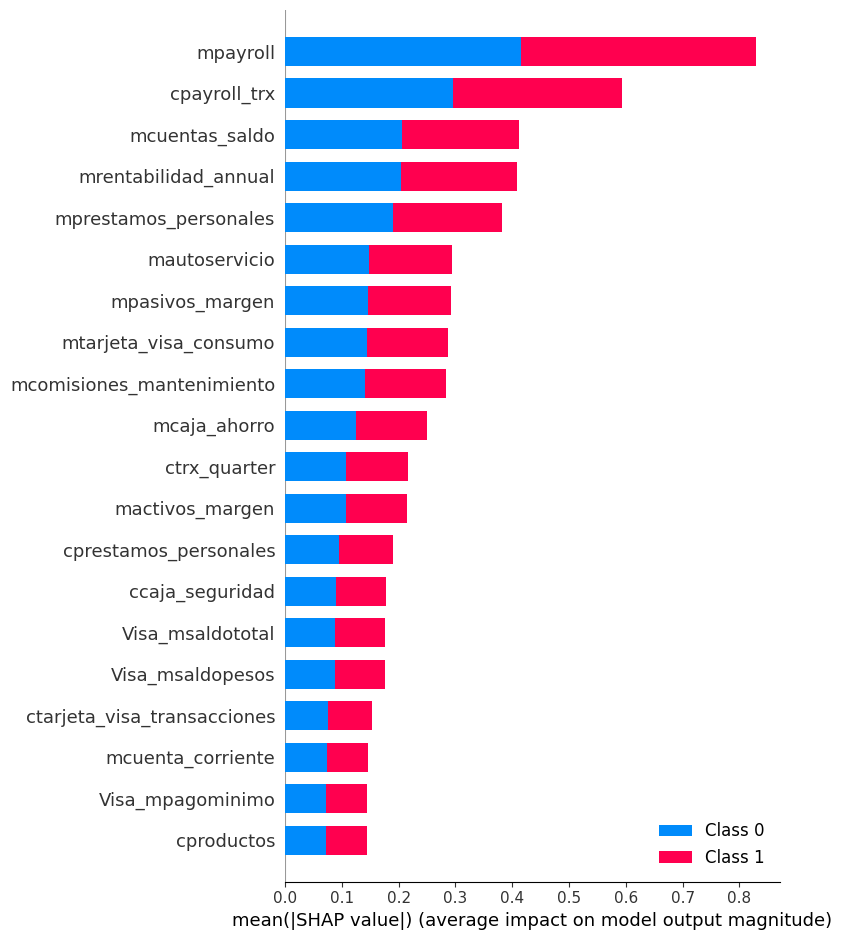

In [35]:
shap.summary_plot(shap_values, X)


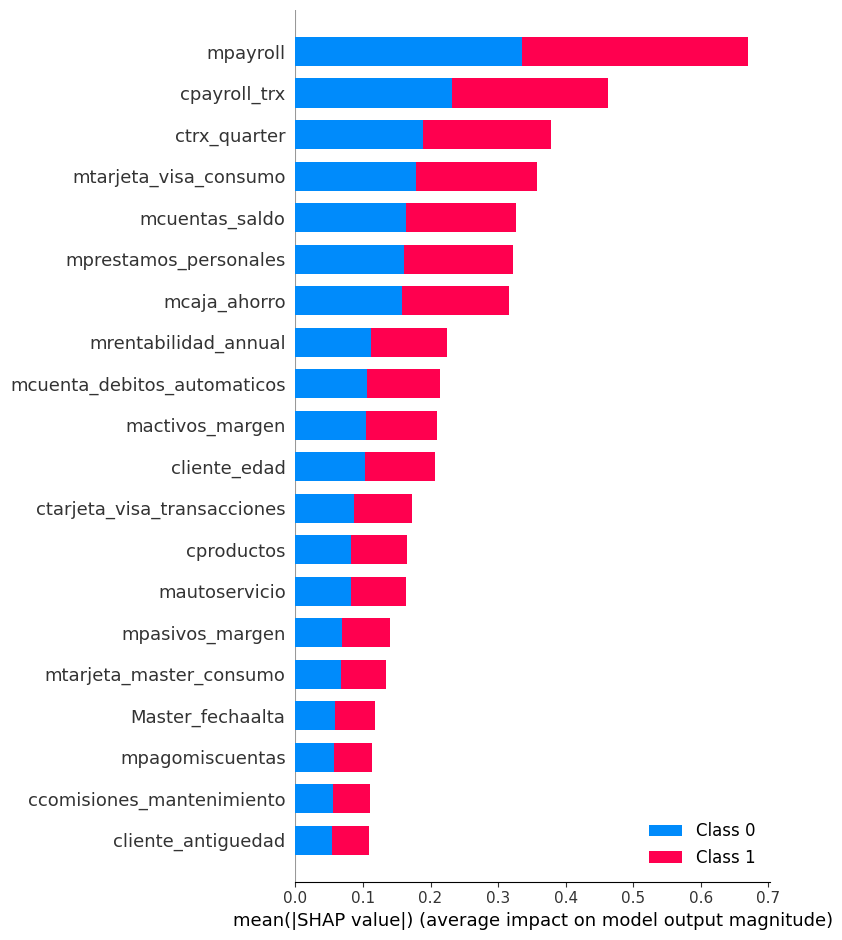

In [49]:
shap.summary_plot(shap_values, X)# enero